## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns
import datetime
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [93]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
print hospital_read_df.columns
hospital_read_df.head(2)
# hospital_read_df['month'] = pd.DatetimeIndex(hospital_read_df['Start Date']).month

Index([u'Hospital Name', u'Provider Number', u'State', u'Measure Name',
       u'Number of Discharges', u'Footnote', u'Excess Readmission Ratio',
       u'Predicted Readmission Rate', u'Expected Readmission Rate',
       u'Number of Readmissions', u'Start Date', u'End Date'],
      dtype='object')


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33,07/01/2010,06/30/2013


In [94]:
# check single variable values
hospital_read_df['Hospital Name'].value_counts()
hospital_read_df['Excess Readmission Ratio'].value_counts()
print hospital_read_df['Start Date'].value_counts()
print hospital_read_df['End Date'].value_counts()

07/01/2010    16860
Name: Start Date, dtype: int64
06/30/2013    16860
Name: End Date, dtype: int64


In [95]:
#hospital_read_df['Number of Discharges'].value_counts()

****
## Preliminary analysis

In [96]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

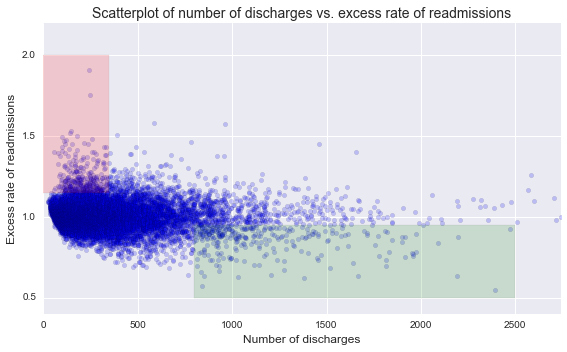

In [97]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

### A. Do you aree with the above analysis and recommendations? Why or why not?

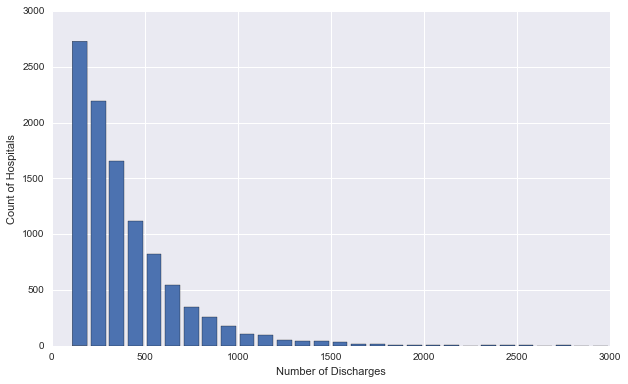

In [98]:
# check histogram of Number of Discharges
import pylab as P
P.figure(figsize = (10,6))
bins = np.linspace(100,3000,num=30)
n,bins,patches  = P.hist(clean_hospital_read_df['Number of Discharges'],bins,rwidth = 0.8, histtype = 'bar')
P.xlabel('Number of Discharges')
P.ylabel('Count of Hospitals')

'''
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(clean_hospital_read_df['Number of Discharges'])
ax.set_xlim([0,3000])
plt.show()


'''
P.show()


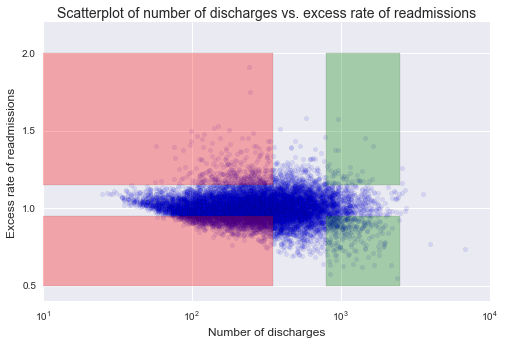

In [99]:
# scatterplot of number of discharges vs. excess rate of readmissions in log scale
x = list(clean_hospital_read_df['Number of Discharges'])
y = list(clean_hospital_read_df['Excess Readmission Ratio'])
hospname = clean_hospital_read_df['Hospital Name']
#y = list(clean_hospital_read_df['Predicted Readmission Rate'])

fig, ax = plt.subplots(figsize = (8,5))
ax.scatter(x,y,alpha = 0.1)

ax.fill_between([0,350], 1.15, 2, facecolor = 'red', alpha = .3, interpolate = True)
ax.fill_between([0,350], 0.5,.95, facecolor = 'red', alpha = .3, interpolate = True)
ax.fill_between([800, 2500], .5, .95, facecolor = 'green', alpha = .3, interpolate = True)
ax.fill_between([800, 2500], 1.15, 2, facecolor = 'green', alpha = .3, interpolate = True)

ax.set_xlabel('Number of discharges', fontsize = 12)
ax.set_ylabel('Excess rate of readmissions', fontsize = 12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize = 14)


ax.set_xscale('log')

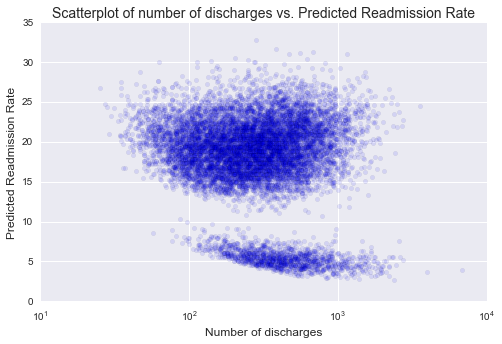

In [100]:
# scatterplot of number of discharges vs. predicted readmissions in log scale
x = list(clean_hospital_read_df['Number of Discharges'])
y = list(clean_hospital_read_df['Predicted Readmission Rate'])

fig, ax = plt.subplots(figsize = (8,5))
ax.scatter(x,y,alpha = 0.1)

ax.set_xlabel('Number of discharges', fontsize = 12)
ax.set_ylabel('Predicted Readmission Rate', fontsize = 12)
ax.set_title('Scatterplot of number of discharges vs. Predicted Readmission Rate', fontsize = 14)


ax.set_xscale('log')

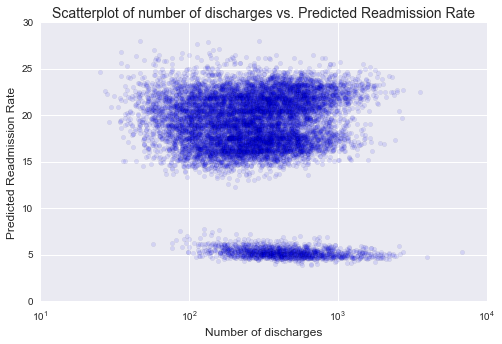

In [101]:
# scatterplot of number of discharges vs. predicted readmissions in log scale
x = list(clean_hospital_read_df['Number of Discharges'])
y = list(clean_hospital_read_df['Expected Readmission Rate'])

fig, ax = plt.subplots(figsize = (8,5))
ax.scatter(x,y,alpha = 0.1)

ax.set_xlabel('Number of discharges', fontsize = 12)
ax.set_ylabel('Predicted Readmission Rate', fontsize = 12)
ax.set_title('Scatterplot of number of discharges vs. Predicted Readmission Rate', fontsize = 14)


ax.set_xscale('log')

In [102]:
clean_hospital_read_df['Hospital Name'][clean_hospital_read_df['Expected Readmission Rate']<10]
print len(clean_hospital_read_df['State'][clean_hospital_read_df['Expected Readmission Rate']<10].value_counts())

51


In [103]:
print len(clean_hospital_read_df['State'][clean_hospital_read_df['Expected Readmission Rate']>10].value_counts())

51


In [104]:
# calculate correlation between number of discharges and excess rate of readmissions
from pydoc import help
from scipy.stats.stats import pearsonr
# help(pearsonr)  # look into pearsonr calculation


# check nan in x and y
xnan = np.isnan(x)
ynan = np.isnan(y)
print 'x nan', sum(np.isnan(x))
print 'y nan', sum(np.isnan(y))

# remove the sample with nan value
#x_nonan = x[np.isnan(y)]
#y_nonan = y[np.isnan(y)]

xarray = np.array(x)
yarray = np.array(y)
x_nonan = xarray[ynan!=True]
y_nonan = yarray[ynan!=True]


a = pearsonr(x_nonan,y_nonan)

print "The pearson correlation between number of discharges and excess rate of readmission is %f with p of %.2g" % (a[0
], a[1])

x nan 0
y nan 81
The pearson correlation between number of discharges and excess rate of readmission is -0.131091 with p of 3e-45


The low corelation value indicates there is barely no association between readmission rate and number of discharges

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
1. Setup an appropriate hypothesis test.
    
    * Null hypothesis: mean excess readmission rate of hospital/facilities with number of discharge < 100 = mean excess readmission rate of hospital/facilities with number of discharges > 1000
    * Alternative hypothesis: mean excess readmission rate of hospital/facilities with number of discharge < 100 != mean excess readmission rate of hospital/facilities with number of dischrages > 1000
    
2. Compute and report the observed significance value (or p-value).
    * p value = 1.27524e-13
    
    
3. Report statistical significance for α = .01.
   
   * Statistical significant

4. Discuss statistical significance and practical significance
   
   * The result is statistically significant based upon the two sample t test

In [105]:
# get hospital/facilities with number of discharges < 100
rate100 = list(clean_hospital_read_df['Excess Readmission Ratio'][clean_hospital_read_df['Number of Discharges']<100])

# get hospital/facilities with number of discharges > 1000
rate1000 = list(clean_hospital_read_df['Excess Readmission Ratio'][clean_hospital_read_df['Number of Discharges']>1000])
print len(rate100)
print len(rate1000)
if len(rate100)>30 and len(rate1000)>30:
    print "Central limit theorem can be applied"


1269
463
Central limit theorem can be applied


1188
463
NormaltestResult(statistic=608.33925182077655, pvalue=7.9581093899479642e-133)
NormaltestResult(statistic=16.707705988017082, pvalue=0.00023548743652770631)


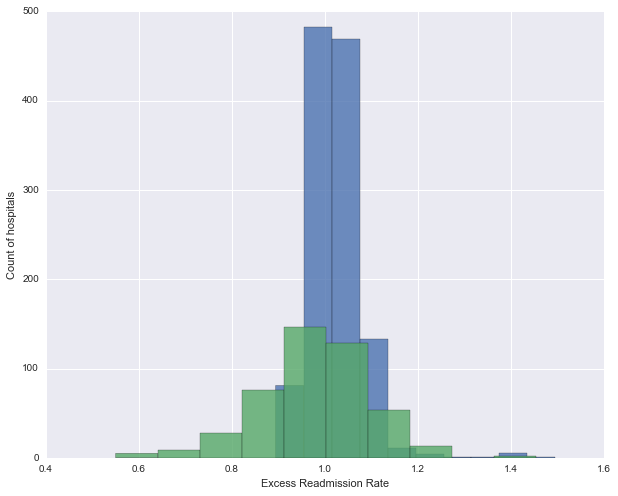

In [106]:
# remove nan
rate100array = np.array(rate100)
rate1000array = np.array(rate1000)

rate100nonan = rate100array[np.isnan(rate100)==False]
rate1000nonan = rate1000array[np.isnan(rate1000) == False]

print len(rate100nonan)
print len(rate1000nonan)

import scipy
fig,ax = plt.subplots(figsize = (10,8))
# normality test
t100 = scipy.stats.mstats.normaltest(rate100nonan)
print t100
plt.hist(rate100nonan,alpha = 0.8)

t1000 = scipy.stats.mstats.normaltest(rate1000nonan)
print t1000
plt.hist(rate1000nonan,alpha = 0.8)
plt.xlabel('Excess Readmission Rate')
plt.ylabel('Count of hospitals')

plt.show()

In [107]:
# Should use z test since there are more than 30 samples
# Implement hypothesis test, two sample t test
from scipy.stats import ttest_ind
t,p = ttest_ind(rate100nonan,rate1000nonan,equal_var = False)
print "ttest_ind: t = %g p = %g" %(t,p)

ttest_ind: t = 7.60174 p = 1.27524e-13


In [108]:
def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - norm.cdf(abs(z)))
    return round(z, 3), round(pval, 4)


X1 = np.mean(rate100nonan)
X2 = np.mean(rate1000nonan)
meandiff = 0
n1 = len(rate100nonan)
n2 = len(rate1000nonan)
sd1 = np.std(rate100nonan)
sd2 = np.std(rate1000nonan)
z, p = twoSampZ(X1, X2, meandiff, sd1, sd2, n1, n2)
print z, p

7.61 0.0
